# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 4

In [2]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [3]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [5]:
dados1 = df['price']
dados2 = df['vehicleType']
dados3 = df['brand']

In [6]:
media_dados = pd.DataFrame(dados1)
media_dados['brand'] = dados3
media_dados['vehicleType'] = dados2


In [7]:
media_dados.head()

,price,brand,vehicleType
0,480,volkswagen,Other
1,18300,audi,coupe
2,9800,jeep,suv
3,1500,volkswagen,kleinwagen
4,3600,skoda,kleinwagen


In [8]:
df['brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'mazda',
       'nissan', 'ford', 'renault', 'mercedes_benz', 'seat', 'honda',
       'fiat', 'opel', 'mini', 'smart', 'hyundai', 'sonstige_autos',
       'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki',
       'lancia', 'citroen', 'toyota', 'chevrolet', 'dacia', 'daihatsu',
       'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo', 'porsche',
       'rover', 'land_rover', 'lada'], dtype=object)

In [9]:
df['vehicleType'].unique()

array(['Other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'kombi', 'bus', 'andere'], dtype=object)

In [42]:
novo_df = pd.DataFrame()
for marca in list(df['brand'].unique()):
    for tipo_veiculo in list(df['vehicleType'].unique()):
        z = df[(df["brand"] == marca) & (df["vehicleType"] == tipo_veiculo)]["price"].mean()
        novo_df = novo_df.append(pd.DataFrame({'media_preço': z, 'marca': marca, 'Tipo de Veículo': tipo_veiculo}, index=[0]))
novo_df = novo_df.reset_index()
del novo_df["index"]
novo_df["media_preço"].fillna(0,inplace=True)
novo_df["media_preço"].isnull().value_counts()
novo_df["media_preço"] = novo_df["media_preço"].astype(int)
novo_df.head(5)

,media_preço,marca,Tipo de Veículo
0,897,volkswagen,Other
1,8014,volkswagen,coupe
2,13946,volkswagen,suv
3,1626,volkswagen,kleinwagen
4,3743,volkswagen,limousine


## Preço médio de um veículo por marca, bem como tipo de veículo

Text(0.5, 1, 'Heatmap - Preço médio de um veículo por marca e tipo de veículo')

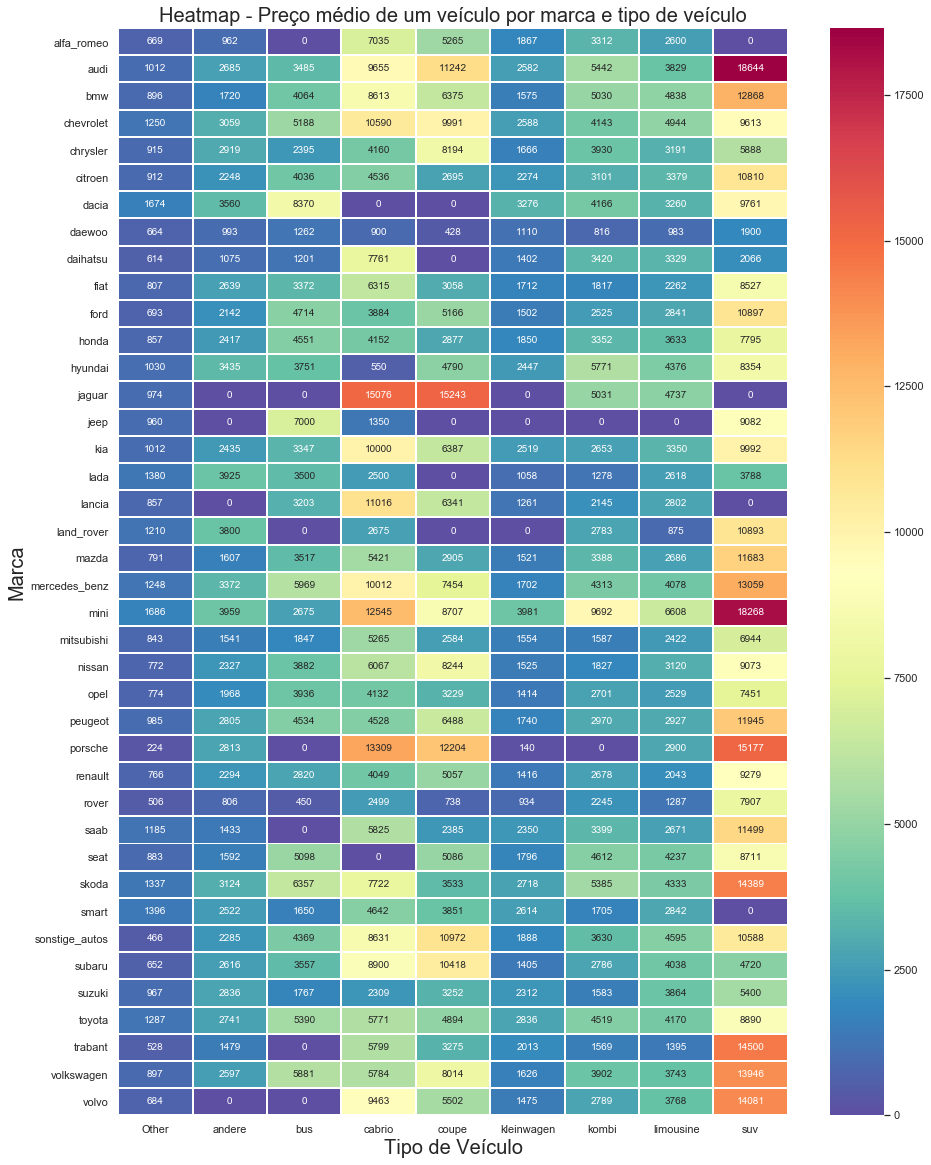

In [62]:
df2 = novo_df.pivot('marca', 'Tipo de Veículo', 'media_preço')
plt.subplots(figsize=(15,20))
sns.heatmap(df2,linewidths=1,cmap="Spectral_r",annot=True, fmt="d")
plt.xlabel('Tipo de Veículo', fontsize=20)
plt.ylabel('Marca', fontsize=20)
plt.title('Heatmap - Preço médio de um veículo por marca e tipo de veículo', fontsize=20)

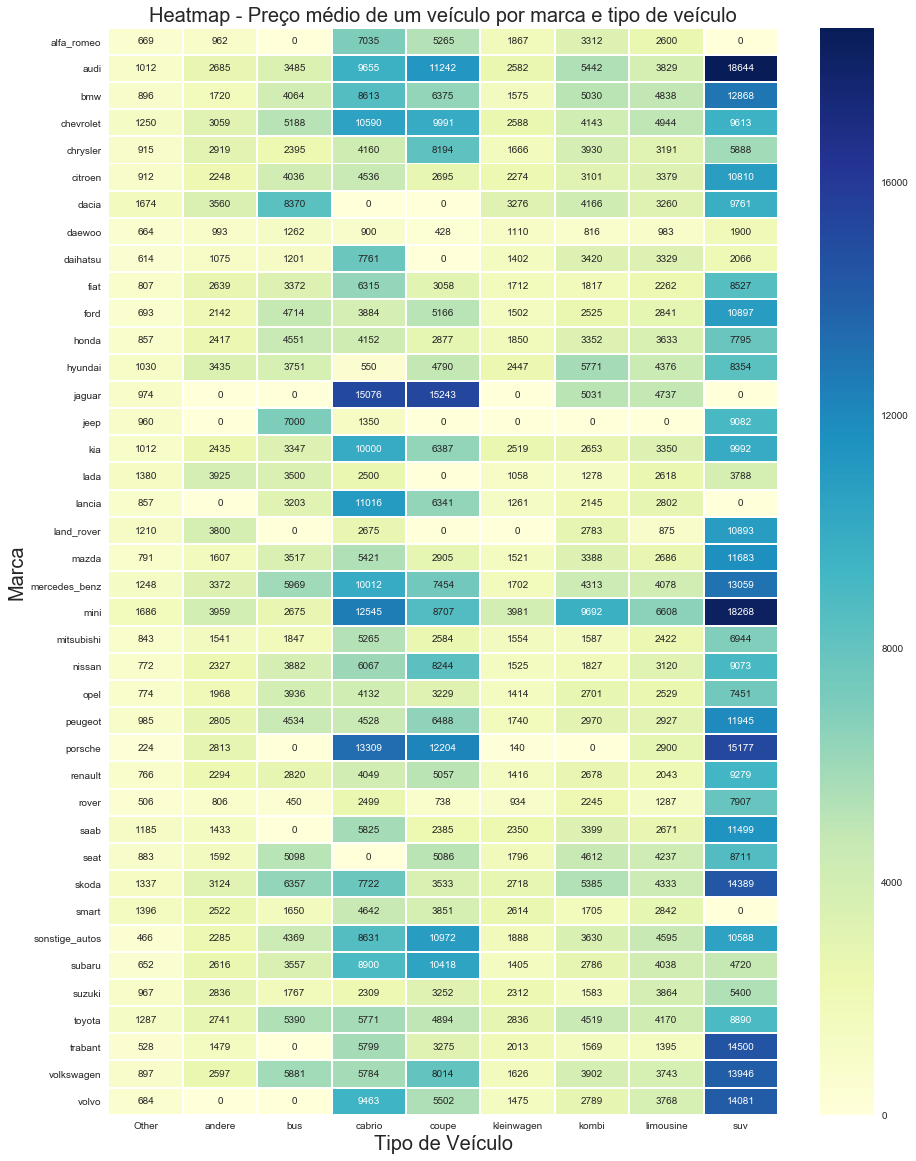

In [4]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo


In [5]:
# Salvando o plot
fig.savefig("plots/Analise4/heatmap-price-brand-vehicleType.png")

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>